In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("./data/china-mentions2018.csv")

In [3]:
train.head()

,id,url,snippet,source,headline,date,desk,section,type,word_count,locations,subjects
0,5c25f42a3a125f5075c020ec,https://www.nytimes.com/2018/12/28/books/revie...,Yan Lianke’s novel “The Day the Sun Died” take...,The New York Times,"In a Brutal Chinese Satire, Villagers Surrende...",2018-12-28,BookReview,Books,Review,634,[],['Books and Literature']
1,5c13aa743a125f5075bff2c7,https://www.nytimes.com/2018/12/14/business/ch...,Car sales are falling. Housing is slow. Worker...,The New York Times,"China’s Economy Slows Sharply, in Challenge fo...",2018-12-14,Business,Business,News,1401,['China'],"['Economic Conditions and Trends', 'Internatio..."
2,5bf244fa3a125f5075bfaf34,https://www.nytimes.com/2018/11/19/fashion/chi...,Western money has been pouring into the countr...,The New York Times,The Great Promise of China,2018-11-19,SpecialSections,Fashion,News,1674,['China'],['Luxury Goods and Services']
3,5be0afdf3a125f5075bf8b95,https://www.nytimes.com/2018/11/05/world/asia/...,"In a significant propaganda shift, Xi Jinping’...",The New York Times,"China’s Leader, Hogging Spotlight, Elbows Comm...",2018-11-05,Foreign,World,News,1240,['China'],['Politics and Government']
4,5c1b763b3a125f5075c012d7,https://www.nytimes.com/2018/12/20/opinion/hua...,"Its leaders are talking tough, but privately, ...",The New York Times,China Is Willing to Make a Deal,2018-12-20,OpEd,Opinion,Op-Ed,905,['China'],"['International Trade and World Market', 'Econ..."


In [4]:
headlines = train['headline'].values
all_words = train['headline'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

(-0.5, 799.5, 599.5, -0.5)

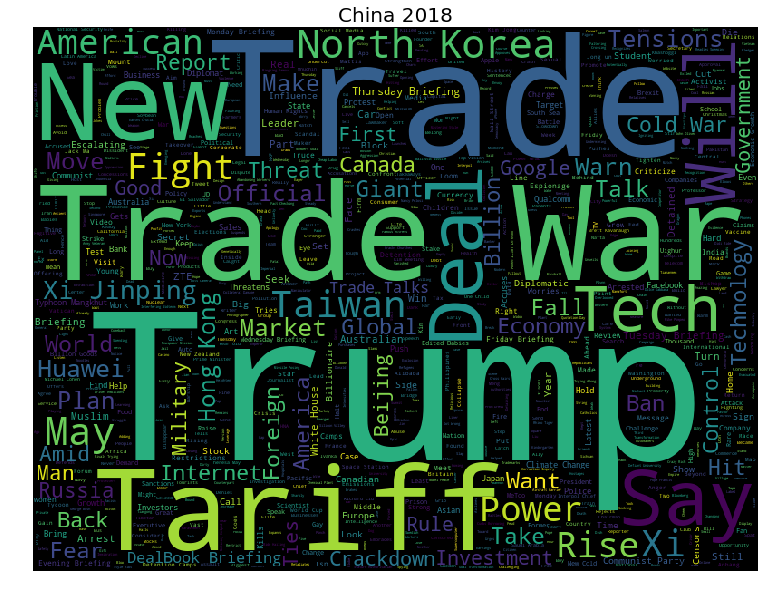

In [5]:
# The wordcloud of 2018 simply remove stopwords
target = " ".join(headlines).replace('China', '').replace('Chinese', '')
wc = WordCloud(max_words=10000, stopwords=STOPWORDS, width=800, height=600)
wc.generate(target)
plt.figure(figsize=(20,10))
plt.title("China 2018", fontsize=20)
plt.imshow(wc)
plt.axis('off')

In [6]:
import nltk

In [7]:
stopwords = nltk.corpus.stopwords.words('english')

In [8]:
# headlines_tokenized = [nltk.word_tokenize(headline) for headline in headlines]
# headlines_stop_removed = [[word for word in headline] for headline in headlines]

In [9]:
target_tokenized_list = nltk.word_tokenize(target)

In [10]:
taget_stop_removed = [word for word in target_tokenized_list if word.lower() not in stopwords]

In [11]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [12]:
taget_lemmatized = [lemm.lemmatize(word) for word in taget_stop_removed]

(-0.5, 799.5, 599.5, -0.5)

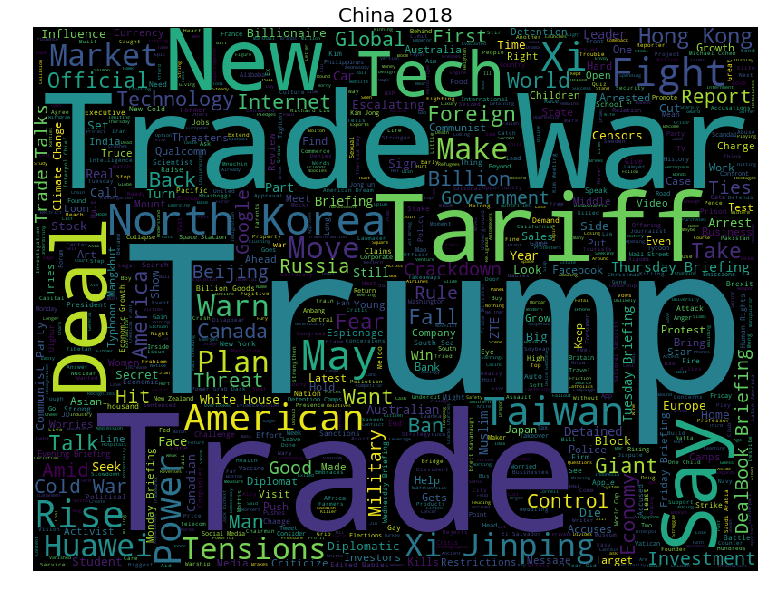

In [13]:
target_updated = " ".join(taget_lemmatized).replace('China', '').replace('Chinese', '')
wc = WordCloud(max_words=10000, stopwords=STOPWORDS, width=800, height=600)
wc.generate(target_updated)
plt.figure(figsize=(20,10))
plt.title("China 2018", fontsize=20)
plt.imshow(wc)
plt.axis('off')

In [14]:
from textblob import TextBlob

In [15]:
total = len(headlines)
positive = negative = neutral = 0
for headline in headlines:
    analysis = TextBlob(headline)
    if analysis.sentiment[0] == 0:
        neutral += 1
    elif analysis.sentiment[0] > 0:
        positive += 1
    else:
        negative += 1

In [17]:
labels = ['positive', 'negative', 'neutral']
values = [positive, negative, neutral]
fig = {
    'data': [{'labels': labels,
              'values': values,
              'type': 'pie'}],
    'layout': {'title': 'Sentiment Analysis about China 2018'}
     }

py.iplot(fig)